In [19]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
from scipy.spatial import distance


In [20]:
mask_path = "./data_set/with_mask"
no_mask_path = "./data_set/without_mask"

image_mask = []
target_mask = []
for i in os.listdir(mask_path):
    pic = os.path.join(mask_path + "/", i)
    image_mask.append(pic)
    target_mask.append("mask")   

image_no_mask = []
target_no_mask = []
for i in os.listdir(no_mask_path):
    pic = os.path.join(no_mask_path + "/", i)
    image_no_mask.append(pic)
    target_no_mask.append("without_mask")

mask = pd.DataFrame()
mask["image"] = image_mask
mask["target"] = target_mask

no_mask = pd.DataFrame()
no_mask["image"] = image_no_mask
no_mask["target"] = target_no_mask

data = pd.concat([mask, no_mask], axis = 0, ignore_index = True)
data = shuffle(data)

/home/azooz-rr/LTUC/no-mask-catcher/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Found 1100 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.
Found 175 validated image filenames belonging to 2 classes.


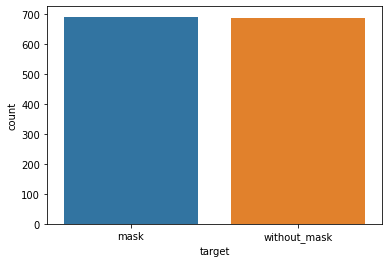

In [21]:
sns.countplot(data["target"])


train = data.iloc[0:1100, ]
val = data.iloc[1101:1200, ]
test = data.iloc[1201:, ]

train_gen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                fill_mode = "nearest")

train_generator = train_gen.flow_from_dataframe(
                    dataframe = train,
                    x_col = "image",
                    y_col = "target",
                    target_size = (150, 150),
                    batch_size = 32,
                    class_mode = "binary")




val_gen = ImageDataGenerator(rescale = 1./255)

val_generator = val_gen.flow_from_dataframe(
                dataframe = val,
                x_col = "image",
                y_col = "target",
                target_size = (150, 150),
                batch_size = 32,
                class_mode = "binary")



test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
                dataframe = test,
                x_col = "image",
                y_col = "target",
                target_size = (150, 150),
                class_mode = "binary",
                batch_size = 32)




# print("Train Seti:","\n",train["target"].value_counts(), "\n"
#       "Test Seti: ", "\n",test["target"].value_counts(),
#       "\n""Validation Seti: ","\n", val["target"].value_counts())

# plt.figure(figsize=(12,8))

# img = load_img(mask["image"][8])
# plt.imshow(img)
# plt.title("With Mask", color = "green", size = 14)
# plt.grid(color='#999999', linestyle='-')
# plt.show()


# plt.figure(figsize=(12,8))

# img = load_img(no_mask["image"][100])
# plt.imshow(img)
# plt.title("Without Mask", color = "green", size = 14)
# plt.grid(color='#999999', linestyle='-')



In [23]:
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input



In [25]:
#### later  8/6/2021
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = models.Sequential()
model.add(vgg19)
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8193      
Total params: 20,032,577
Trainable params: 8,193
Non-trainable params: 20,024,384
_________________________________________________________________


In [26]:
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

/home/azooz-rr/LTUC/no-mask-catcher/.venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [27]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator)//32,
                    epochs=60,
                    validation_data=val_generator,
                    validation_steps=len(val_generator)//32)

Epoch 1/60
1/1 [==============================] - 10s 10s/step - loss: 0.7145 - acc: 0.5312
Epoch 2/60
1/1 [==============================] - 8s 8s/step - loss: 0.7158 - acc: 0.5000
Epoch 3/60
1/1 [==============================] - 9s 9s/step - loss: 0.7528 - acc: 0.5000
Epoch 4/60
1/1 [==============================] - 9s 9s/step - loss: 0.7116 - acc: 0.4688
Epoch 5/60
1/1 [==============================] - 8s 8s/step - loss: 0.6169 - acc: 0.6250
Epoch 6/60
1/1 [==============================] - 8s 8s/step - loss: 0.6282 - acc: 0.6562
Epoch 7/60
1/1 [==============================] - 8s 8s/step - loss: 0.5700 - acc: 0.7188
Epoch 8/60
1/1 [==============================] - 8s 8s/step - loss: 0.6178 - acc: 0.7500
Epoch 9/60
1/1 [==============================] - 10s 10s/step - loss: 0.6634 - acc: 0.5625
Epoch 10/60
1/1 [==============================] - 8s 8s/step - loss: 0.6472 - acc: 0.5938
Epoch 11/60
1/1 [==============================] - 8s 8s/step - loss: 0.6712 - acc: 0.6562
Epoc

In [28]:
test_loss, test_acc = model.evaluate(test_generator, steps = 9)
print("Test ACC: ", round(test_acc, 2))

9/9 [==============================] - 32s 3s/step - loss: 0.3928 - acc: 0.9257
Test ACC:  0.93


In [31]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0,
save_best_only=True, mode='auto')
